Psuedocode: 
Create a matrix of length of T/delta T by L/delta X
define a c

we have the initial 


In [1]:
R = 2 #length
T = 1 #Total Time
delta_t = .01 #Timestep
c = 1 #Wavespeed
     
delta_r = .01 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = R/delta_r #number of segments of string
using Plots
using FFTW

In [109]:
gamma = 1.2
#Initial Radius
r = zeros(Int(nrsteps)+3, 1)
r[1]= -1*delta_r
for i = 1:size(r,1)-1
    r[i+1]=r[i]+delta_r
end

#Time
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i = 1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end

rho_0 = zeros(Int(nrsteps)+3,1)
#placeholder rho_0
for i = 1:Int(nrsteps)+3
    rho_0[i] = 10*sin(pi*r[i]/R)/(r[i]/R)
end
p_0 = zeros(Int(nrsteps)+3,1)
#placeholder p_0
for i = 1:Int(nrsteps)+3
    p_0[i] = rho_0[i]^2
end
M = zeros(Int(nrsteps)+3,1)
M[1] = 0
for i = 3:Int(nrsteps)+2
    M[i+1]=M[i] + (4/3)*pi*(r[i]^3)*rho_0[i]
end
g_0 = zeros(Int(nrsteps)+3)
for i=1:Int(nrsteps)+3
    g_0[i]=M[i]/(r[i]^2)
end
#Zeta_r for normal intervals
Z_r = zeros(Int(nrsteps)+3,Int(ntsteps)+2)
for i=1:Int(nrsteps)+3
    Z_r[i,1:2].=4*sin(25*pi*r[i])
end
rho_prime = zeros(Int(nrsteps)+3,Int(ntsteps)+2)
p_prime = zeros(Int(nrsteps)+3,Int(ntsteps)+2)
dp_prime_dr  = zeros(Int(nrsteps)+3,1)
for j = 1:Int(ntsteps)



    #rho_prime calculation
    for i = 1:Int(nrsteps)+2
        rho_prime[i,j+1] = (-1/((r[Int(i+1)]^2)*delta_r))*(((r[Int(i+1)]^2)*rho_0[Int(i+1)]*Z_r[Int(i+1),j])-(r[i]^2)*rho_0[i]*Z_r[i,j])
        print(rho_prime[i,j+1])
    end
   #pprime at 
    for i = 1:Int(nrsteps)+3
        p_prime[i,j] = gamma*p_0[i]/rho_0[i] * rho_prime[i,j]
    end

    #dP/dR at normal i
    for i = 1:Int(nrsteps+2)
        dp_prime_dr[i] = (p_prime[i+1,j]-p_prime[i,j])/delta_r
    end
    #dZ/dt^2
    for i = 1:Int(nrsteps+3)
         Z_r[i,j+2] = (2*Z_r[i,j+1]-Z_r[i,j]+(delta_t^2)*(dp_prime_dr[i]-rho_prime[i,j+1]*g_0[i]))/rho_0[i] 
    end
    #Boundary Condition 
    Z_r[size(Z_r,1),j+2]=delta_r*(Z_r[Int(size(Z_r,1)-1),j+2]-(2/r[Int(size(Z_r,1)-1)])*Z_r[Int(size(Z_r,1)-1),j+2])
end


NaNNaN-10342.953514163864-3298.3425819553734996.3936101627248876.6333815877846383.446371921504-350.90206370449505-6789.464106364817-8856.197029386954-5341.2376094150351501.1576251418897429.414219997748824.1397960042724856.758561819174-2054.90980361074-7737.693741518975-8780.537553077274-4567.5820189060812374.29287166535967900.88050073438725.4934458038174367.447906441387-2576.1991501664625-7984.336885206798-8659.13760233911-4214.075626836462709.7515844401678016.9224746768048581.6267673020014087.359869386758-2799.2077451929977-8013.411475213643-8493.143860514225-3976.5509033823432857.94507495953537982.2097157290668393.897462327033875.407936827467-2893.966576626748-7928.507202284873-8284.12122711191-3780.08459181665742912.3735639141137855.7325842268538164.0732267136133688.104139799126-2916.5904336654767-7766.288357614527-8034.03522587622-3597.82106805302652909.0190971454337661.9499170810337894.31189186121453508.1193771595385-2891.410499138837-7544.09484953493-7745.229940675241-3418.234392

33345.65654526868-2012.422803316031-33520.425109498254-43250.771964996304-27282.8268405616583074.89268624340629061.23973283347436001.47868056461421543.591169366257-3993.9390967074773-24741.719249746155-29067.658949294204-16039.4575075800394978.77120350566720776.48676117778822458.0660912066710337.710263646908-7027.567162419468-18513.024538388294-16767.56036576706791.0656790783763-1.336602029251123e171.3232668521389274e17NaNNaN-261867.30779664314-7634.14793393021187445.13770698736205737.8632925193870241.80027622744-106915.28133363345-203871.86645657846-161960.02994051945-14591.59064031418140310.58949918314204301.31898250684138974.81963587107-12709.74201786338-155371.42914347115-201099.7290317126-123104.199381404929203.397857237112161884.10154161198194595.3549771852109248.53176497613-40228.462784756535-162187.8837039873-183800.59533444987-94844.6178853729547747.991811174594156452.23901291535167363.599742968978265.97548748752-52427.923198549455-143970.20304168717-143788.3457876458-58320.15

4.117703015804298e6-4.094738601849568e7-6.237521148289621e7-4.699200965308786e7-3.459933176322347e64.261245411308152e76.3812628665994935e74.7320396164645836e72.6998936884494815e6-4.3672515732296325e7-6.428388156422764e7-4.689869458113784e7-1.8653246000137646e64.407416152985891e76.3750681261675745e74.5727567867904015e7987574.5034272082-4.378632803705989e7-6.221017314100079e7-4.383488578219068e7-100229.815498332254.280240295844782e75.9696073619016655e74.127517471893084e7-762388.9284736193-4.114116870658578e7-5.627803097770628e7-3.812775347677513e71.5667749472769995e63.884648554490535e75.2059186935532905e73.449362457161461e7-2.2817273530793902e6-3.598567753982997e7-4.7172013950684786e7-3.0491267694750633e72.8796763438485144e63.264664365933756e74.177259707659696e72.6251557243457023e7-3.337712472586007e6-2.893376100644361e7-3.6033609013782464e7-2.191210116536071e73.6381507047944153e62.4962653641193494e73.0136277932084e71.7611385404612068e7-3.768352818794577e6-2.0853809584872685e7-2.42616375

5.123623885578115e8-5.987634526200975e8-1.3157879679368377e9-1.235280607851919e9-4.397678413810678e85.720481250242963e81.1986701351271293e91.095348897196966e93.6369414088935447e8-5.32810544401157e8-1.0625267964304295e9-9.423028776939793e8-2.876204672302251e84.824658765356946e89.130134867499584e87.826810034506516e82.149484878189928e8-4.229123297195023e8-7.562446905931095e8-6.231256926717403e8-1.4883591867166474e83.563373930764557e85.983504014114108e84.699740128040019e89.210033327447592e7-2.849146110672999e8-4.449553040576925e8-3.2887395596928e8-4.727942895009382e72.1026007843724564e83.0046277852493507e82.0443051039466402e81.7097779982061036e7-1.3210762554918113e8-1.664778363181871e8-9.957743503863622e7-6.198701660469766e64.324007225050416e73.3400574042505506e74.203017933329654e63.274967065848495e62.4553579614066796e182.301012805534564e443.708134147862855e601.0523106321622194e87-1.0418089969293057e87NaNNaN-3.6351663525972806e71.2040289399489872e81.1443410863658322e81.6170350156288657e7-7

1.1470850125662459e113.7058481997262276e10-6.112497147954064e10-1.1996591874903047e11-1.0493779443742671e11-2.7188930179259342e106.4491381700070496e101.143884166262392e119.385865453322235e101.777866946999774e10-6.599811023875497e10-1.0681858978393718e11-8.19601028619724e10-9.207470513402218e96.562951955155947e109.761452246750119e106.973287546176392e101.7706930681225638e9-6.347973800827487e10-8.719165499012111e10-5.763290822753534e104.337044343867814e95.9736287085919174e107.598368834548454e104.604618516783352e10-9.027112553305042e9-5.464804784124492e10-6.439129769361707e10-3.525263078777967e101.2307173474041742e104.846345440870612e105.2696139879699234e102.5371428602303158e10-1.4244380653359043e10-4.127171862285488e10-4.081717894629708e10-1.6166278038452877e101.4879213414201542e103.2355387095239388e102.6884544210652836e104.807210772214486e9-1.723335982432767e10-2.3697388632499287e18-1.3205183307104288e44-2.1271588417930725e60-1.9934444636283667e86-3.2124808126529413e102-9.116519467668527

-7.541638305223087e10-1.4670624310785828e11-1.3548253559886966e11-2.5966682755052967e101.3047067788366869e112.3570338633941553e112.0449333185094583e112.8183241053468983e10-2.0307253073767276e11-3.437192963282294e11-2.8311257157864886e11-2.722219896964309e102.8668764175233496e114.6264560889971735e113.682381067979254e112.9859643562988926e10-3.663296951633858e11-5.782592787366593e11-4.5764622106794e11-5.111335939545725e104.1616579203743555e116.70036787885249e115.521346163985161e111.1715025941916504e11-3.9797328435653467e11-7.120856930024491e11-6.581561023185792e11-2.6751833251338504e112.6112992538166718e116.754194656148667e117.905261764939817e115.559058043924467e115.523061221267205e10-5.315959968730888e11-9.745938307095262e11-1.0486197501636195e12-6.174720134746104e112.5746480363497748e111.2471473343585513e121.8201451491118284e121.490058480322505e121.5953430500902292e11-1.6553400189126938e12-2.9455138684147744e12-2.725943813923173e12-7.163464910662942e112.2531034249173105e124.489759637000

2.2497042308394948e153.9414995413956935e153.1961531591919675e154.5097145977224044e14-2.594954704070188e15-4.040573544621897e15-2.979214963275528e15-7.245093665165031e132.865006253390629e154.007226619171187e152.661634837534887e15-3.0720654030714444e14-3.03630881843476e15-3.8423219194449445e15-2.268342448936014e156.567897243375369e143.0938884212050615e153.5581629624357515e151.8304255394183485e15-9.485078112743286e14-3.03318164521151e15-3.1769179040408115e15-1.381277472218448e151.1612901766200605e152.860336807634873e152.7276745912281875e159.525619100057942e14-1.2829237773008425e15-2.5908360756083325e15-2.2425189314517855e15-5.706333205764525e141.3105849165760308e152.246456397233637e151.752037433795929e152.538840860512306e14-1.249491987114885e15-1.8505089894901872e15-1.280215728873287e15-1.0921133448238986e131.109618557191794e151.4206416368972312e158.370103951683062e14-1.6286367984733103e14-9.02587314998478e14-9.600114064445351e14-4.089737884399149e142.840788574954321e14-5.716385552420465e

-5.766326610276513e154.582693366837224e147.486774818803415e151.082693354064608e167.749444406001339e15-6.505894263681559e14-9.706564257707832e15-1.3832335568543706e16-1.0019775148839018e167.268407841141077e131.0889185282847522e161.6212069795196984e161.284167072418949e162.4179194096382405e15-9.650967689324836e15-1.729046399678715e16-1.686112791378009e16-8.552290906565407e154.229514674517321e151.6500252172735532e162.324135753066287e162.059872367249982e167.284488912687074e15-1.3627938226714918e16-3.371013296552102e16-4.112765063764402e16-2.656537054825669e169.061405341431254e155.0451334695707256e167.257165371688848e165.456793207890731e16-3.9588127214615535e15-7.579438208481451e16-1.1661515570392355e17-9.103796431821165e162.5258668152637025e141.117023585123639e171.735148988225248e171.3415146888968219e17-4.254259587819344e14-1.59125351730684e17-2.415102283567307e17-1.8042085914283773e177.047817617915435e152.1735297351084166e173.1650883094029e172.24968638700613e17-2.213902008126534e16-2.83546

-3.299822382269214e183.8506638003558733e189.378629680231803e189.4984999102647e183.5448538204676557e18-5.245693827912075e18-1.1473016937053612e19-1.0919312335126573e19-3.4123285324473533e186.745523585256208e181.3258365263031267e191.179174814858683e192.8844363983418655e18-8.158307135788918e18-1.4470325022490563e19-1.1965698619536007e19-2.0259947261687818e189.261539310627434e181.4898262707903242e191.1395639372438417e199.792110204261825e17-9.84654496513688e18-1.4434954974021333e19-1.015820480259448e196.27720166769959e169.766565650389199e181.3107584135215837e198.441845778423669e18-8.980657515328896e17-8.975285941250621e18-1.1079842616202904e19-6.509434808837798e181.3630295268535007e187.54406637652297e188.622553904319476e184.642742027476386e18-1.3709607843143434e18-5.651752966285791e18-6.059412143668034e18-3.0833886485384996e189.316590404295823e173.549463104228402e183.702623802921398e181.9863767644309238e18-1.4747141725973475e17-1.5124569380382282e18-1.7994653041137034e18-1.4012835025214313e

4.090403217980331e1161.2449712326043029e1422.0030629586305567e1587.9040203087819555e1831.272533652918512e2007.09109369919963e2251.1422698427912497e2421.0704661303818937e2681.7250803657642164e284InfNaNNaNNaN3.881915115814832e14-1.7901998643794268e15-1.4851430831357158e153.3340493380821984e131.3014748178503575e151.3856863484047515e153.307708268252244e14-9.739291040938386e14-1.4781423765626892e15-7.642401969950566e146.173310759290496e141.5481278720138195e151.2153866515218958e15-1.9736094469835775e14-1.576865309008336e15-1.7244070234892808e15-3.628141586339291e141.5162151401600932e152.338746107007982e151.2230633291348925e15-1.161823935696111e15-2.944841743808398e15-2.4843280019202955e151.8622158262771747e143.1366589047689535e153.912948852930783e151.5559735537270842e15-2.3785600088238305e15-4.817977276854977e15-3.6007111168408605e155.81963136090714e144.484783873030587e154.864223214898502e151.3034885395371672e15-3.189434269834317e15-4.625858973071737e15-1.6564834979282345e152.867974446404725

1.0205305699923508e235.3696122875653795e22-3.045318219976524e22-9.608090282460427e22-1.0022186535799352e23-3.977130645151011e224.61691203372426e221.0189777132566515e239.170343571838513e222.308843349933108e22-5.869852152491418e22-1.0085905703678248e23-7.758749952698337e22-6.063981506114657e216.613948950347975e229.303981527804009e225.9887035780812e22-8.869595979743728e21-6.748503396880122e22-7.962670028899814e22-4.109157768942262e221.979013557360328e226.28132261714246e226.262030746078167e222.361440781591181e22-2.566035765515608e22-5.319103822850054e22-4.434549820173879e22-9.292833361084358e212.6451056543729864e224.033303973608659e222.6919654332532263e22-9.186722203191668e20-2.299423618841656e22-2.6137174931678953e22-1.1874725662523193e22-9.35053173172993e33-1.6687488392494645e59-2.6777742400788002e75-5.5547651719235775e100-8.922372594420632e116-2.2042049894634576e142-3.5436533118277174e158-1.0785602779099134e184-1.735320531714077e200-6.847517530997452e225-1.102438525804669e242-6.14325198

-3.7757286772114496e175.271270881805961e171.0762696793107666e186.894938900091588e17-4.290686024213309e17-1.3491231795087396e18-1.1662114499875418e181.393377168555263e171.5324458765452493e181.7277519285049262e183.714137128751894e17-1.4724963869468815e18-2.127570550772265e18-8.443827898999758e171.317261769640291e182.2683702151977907e188.619573371479133e17-1.7277377044324122e18-2.776258384082577e18-6.067073153352072e173.2942228346397885e185.005991904327711e181.712005207991066e18-4.95268157561608e18-9.305647197058265e18-6.313426834273235e183.2134989328933463e181.2138145495522517e191.272967797596891e193.9585184780691564e18-6.922119304899292e18-1.1166737006116567e19-7.71524061460573e18-4.65677814071549e18-9.255376742921062e18-1.5594957216392182e19-5.332462932432758e183.2760813031223415e197.964321524270062e198.646583067543593e191.1611108677735348e19-1.2818353469728693e20-2.41153513317247e20-2.1160428500993806e203.7037807044449306e183.091513441252612e205.043255993173331e204.1478445213371807e20

7.36170059773787e1031.3138107735286379e1292.1082193814590351e1454.373282638852443e1707.02460967419082e1861.735376944756485e2122.7899284716947753e2288.491536171826827e2531.3662228589874535e270InfNaNNaNNaNNaNNaNNaNNaNNaNNaN-2.747392610067425e19-2.507529616484151e181.6076766904234488e191.6563429096218376e193.042453376530258e18-1.2030302192956486e19-1.6725618516364476e19-7.59473824890564e188.069900161525515e181.7615045944002738e191.2768797566647955e19-3.3303464113788585e18-1.7757377403648502e19-1.7804043724279546e19-2.0025504194744294e181.721527424697056e192.2804236651299308e197.89366126167321e18-1.6427400423562383e19-2.8631917048340267e19-1.5242988259638542e191.5086619373244834e193.6011888270338662e192.565036177390684e19-1.1490614962405669e19-4.408250331179012e19-3.962680886161932e193.884980605498823e185.041064062533172e195.47123185416753e195.973101431536401e18-5.496200239403896e19-6.774309431970882e19-1.12915215242873e196.622721519802196e198.408032693321543e198.659386551509931e18-9.87342

5.333288161907476e201.0598238531301486e215.2905448372056385e20-6.741652980195919e20-1.3254729269878116e21-5.344510371562384e201.1523138047169534e211.9802921426471483e216.59078582886308e20-2.011672342631727e21-3.4232734978978606e21-1.5732541925518654e212.5216012947735147e215.15421357213046e213.3666576258445717e21-1.6191876978326687e21-4.967921969757962e21-3.1956910427225635e211.2557929013737045e211.7000173482246548e21-4.783067995838842e21-1.0985354355020201e22-4.0932919994952723e211.947262118934897e224.278985013198585e223.6672189224122373e22-1.2955718258479235e22-8.153530931328306e22-1.1398679404446982e23-6.7126035865873255e224.740356840738308e221.6301995528943894e232.0766270991721074e231.5650211003211037e233.1757183464694935e22-1.4681746540114765e23-3.826079313030682e23-6.25961975351936e23-6.611561097471771e23-1.480056440751564e231.0478341742587018e242.40876954675684e242.700038805345403e247.125643558124063e23-3.4084860796960587e24-7.307751210114441e24-7.271993533235187e24-9.64925075216

1.330437971045811e309.510385052680113e29-2.860321372532418e29-1.474599675709974e30-1.6574537990729166e30-5.7419251209615846e291.0844648092503849e302.1344717188007084e301.751057652294142e309.350969667547294e28-1.76290980786695e30-2.551447136792818e30-1.6864737958254015e303.243577090917596e292.20642020999378e302.7505413482095945e301.590591730190365e30-5.727998499072197e29-2.42107719555881e30-2.8323795264592813e30-1.5533764867128782e306.622347155221232e292.507239622594369e302.887960062646928e301.563700704367288e30-7.027997146729332e29-2.5755700274860934e30-2.925057363186831e30-1.5145892511317615e308.235979560549823e292.663462492874604e302.857444074089561e301.2747376245754318e30-1.0841075876999593e303.106523462817957e474.960073528243563e636.196796444455648e889.908019001359484e1041.376932892169433e1302.204432835909464e1463.4470111716414677e1715.525204556345251e1879.860592910157885e2121.5822897410133966e2293.282296100142686e2545.272206450546558e270InfNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN-1

-6.423955688957063e26-2.9921691655831784e266.276419910302603e261.5777183337125512e271.68479085510933e274.919927957093448e26-1.5459046959734132e27-3.3249178409877906e27-3.8858440178752476e27-2.8261195101258846e271.431672664570116e265.546132761804557e271.2800792401141706e281.745912944866725e281.0728322349540043e28-1.425053670989624e28-5.049990910565214e28-7.0342441105382015e28-3.7711708021473273e285.8339844861654685e281.7118541805386555e292.028402848104186e296.890329401157579e28-2.089564451991497e29-4.617854577752119e29-4.526671449902266e29-5.9940233471435895e285.6186400122253374e291.0017983288426755e308.43069121671151e294.6848634893144616e26-1.1192973000746123e30-1.8085050846331318e30-1.5080809163741216e30-1.9619220910780516e291.5699360071442416e302.953596765228064e303.201835984781461e301.839647879650723e30-1.2054119016600004e30-5.258634182141467e30-8.401914377628611e30-7.601617138344335e30-4.06339629702772e291.2012635526043997e312.276336316727042e312.1356246159535787e311.17380330833597

3.899425083072281e245.058480665972678e242.0955058836237053e23-4.346914695730947e24-4.411624949556415e24-7.468242777061551e224.692993576578331e245.331373644403221e247.292290823152632e23-5.324518786135611e24-7.016974425626068e24-1.8568860487948927e246.200066001759333e249.424346274561311e243.443865397368846e24-7.441127688192147e24-1.2757497032342075e25-5.533074864937313e249.333494010820343e241.7419983127461481e258.181383336332703e24-1.2357074869021732e25-2.3979062395233257e25-1.1308081852098726e251.7377093677133657e253.318620354953439e251.4394637046133277e25-2.6129413406866746e25-4.6271278804375626e25-1.6324651141761645e254.1692063629287155e256.529706517703451e251.5526195199973317e25-6.804549393234466e25-9.19697246403248e25-8.663032944778794e241.0939387855412053e261.2315856559094936e26-1.6549684359537681e25-1.7548757301365425e26-1.4879819662693144e269.291106029873056e252.9934244952392284e261.6980508933712366e26-2.615290335532534e26-5.387118191917511e26-2.2799788994275878e264.9636963332704

-1.843548956498542e27-2.34479801918092e271.4490971955499957e263.2466547528971187e272.8361986318020895e27-1.9089882357152245e27-5.993474516345201e27-3.155809388523911e275.868845353319102e271.1329582204074599e284.155889341334418e27-1.1261614869340684e28-1.7865707871284068e28-4.8912457361623117e271.4571008044386113e281.3933177347939633e28-1.1071276710724829e28-2.304536838075097e281.9897266037224036e289.44805430718317e289.786243444030442e28-5.384371884394933e28-2.8790685605594788e29-3.700758570460901e29-1.0996076830175795e293.9553359399352235e297.78679512051165e297.371967779218725e293.253722649081103e29-2.3269646027348204e29-1.0386071435022134e30-2.472139305146957e30-4.0758806826311816e30-3.442352447645472e302.5925911941499566e301.3631656302122643e312.1686521802180085e311.3729149301457738e31-1.6594596417445388e31-5.560933751020099e31-6.974998136374491e31-2.7922674383602513e316.557864839192803e311.570479343526626e321.7008393028998314e326.100154783283891e31-1.403956497332489e32-3.39641192981

-4.137852078847814e36-7.692254586267145e37-9.839927107472127e37-4.547389796307967e374.868900330628566e371.1473407488395048e389.829308168542499e374.4066597026464803e36-1.0095448686396472e38-1.3736682495506348e38-7.153348442373311e375.340686007220527e371.4606887835355937e381.3416603247518174e382.0892287361642735e37-1.137341330951658e38-1.7005661402219333e38-1.0310040615945563e384.191113480223377e371.6072425396573086e381.6590104863265584e385.158252565021625e37-1.0130830206286372e38-1.8328057809835224e38-1.3564986041311794e387.409850683476459e361.440092027194068e381.781943413678942e388.798302947818154e37-6.064004165276007e37-1.626814927560675e38-1.4913118305614688e38-3.4149657636994626e379.826783317514643e371.5609801239684754e385.848071753225437e384.252677785987677e636.758031355635419e796.45353176577549e1041.0272562395606233e1211.0652945465693265e1461.698387111684804e1621.9255656169791996e1873.0744808973728967e2033.841058440948913e2286.141444270338169e2448.534861126218901e2691.366408502808

-1.909353358826234e33-4.5743437043241717e33-4.5021125579307483e331.6159085891670167e331.2281602974389273e341.9046649885605062e341.1598836191053382e34-1.207204120152401e34-3.984125302515041e34-5.196129370308809e34-3.4633232709218334e341.3127509893030968e348.477134659974294e341.6540595996559737e352.0691502711441353e351.0583536472550103e35-2.4010760551663227e35-7.581595724370805e35-1.0356392904960041e36-4.486039651342017e351.2514893282625758e363.2149919344650675e363.4642847147504384e362.4021840114714836e35-5.777800371604377e36-1.0346165673091898e37-7.734864661435391e364.136313667292561e361.9235202968657434e372.4855583788816773e371.0693485330924381e37-1.9907209654138485e37-4.690236849148984e37-4.530231436279194e37-6.014544424678407e365.103040431320645e378.591708630706564e376.756970035358788e37-5.085687422316861e35-7.991723026188908e37-1.2528326804868278e38-1.1351942799222008e38-4.839866320182922e375.764946093691018e371.9064245553874935e383.0585720711565526e382.9676644201642666e383.75754866

NaN3.508080268679529e29-4.613383600746157e29-6.370791969019407e29-3.717468811695864e286.842134654212412e297.381316250319859e29-6.70682936612644e28-9.762556234281035e29-9.824059411332763e291.659157269655246e291.4342173306929883e301.3684573453484828e30-3.498746314991422e29-2.1624838422293874e30-1.908361721206818e307.559058781749286e293.3255121615615674e302.5777496361014204e30-1.6387638987823386e30-5.163244346353262e30-3.232747604531567e303.465623494617674e307.963238970868803e303.459789820193248e30-7.083693704379939e30-1.189882574007124e31-2.278142981058429e301.383063914612535e311.6764857271003227e31-2.5029586893504026e30-2.540302821572669e31-2.1087282166396256e311.4908781105752271e314.331451417263055e312.005879573055454e31-4.190477810618304e31-6.671173044797668e31-1.9624074463326163e309.403330988969004e318.882580461687244e31-5.550449688281971e31-1.8189031915427915e32-8.779668660980352e311.8289979354208766e322.913497903088495e32-3.475862854349721e30-4.1541163533945906e32-3.226784978645828

1.7647041111628727e393.9767777860783025e393.8459391868487196e391.6867331936045925e38-5.629848121426798e39-9.869396176288187e39-8.952479010478881e39-1.660413416265993e391.0443084117966274e402.3759816404141793e403.1660994524246313e402.213385287618813e40-1.7746562919711075e40-8.424360049104768e40-1.3537246538235662e41-9.381920164046923e409.020020049477081e403.500543671632612e414.606280816240838e411.7125634901090238e41-5.299934620366591e41-1.2012556943776184e42-1.1042361395960307e421.9061763874695636e412.1275995785627284e423.1205190981533295e421.598022484045577e42-2.344652887497069e42-6.113403485075379e42-5.921708766729749e421.0490205682498544e408.698004108175239e421.3107745433023847e437.231158497500392e42-7.698476054379047e42-2.1407093043937708e43-2.079206915198615e43-1.2772131931746207e422.602573336413858e433.9029150328096794e432.1693472323276247e43-1.9769668551899843e43-5.560647145701571e43-5.292901082490054e43-4.0706230276261385e426.003730249922784e438.773939165717624e434.7288620209732

-2.616771840858846e45-5.6408085314513e45-4.449672116628835e455.380203637709122e445.6910048840407844e456.800368903963118e452.545057310616121e45-4.141534922442821e45-8.08126030538546e45-5.895879729490059e451.0827463619365405e457.595279960434998e458.497882742735957e452.802541940886903e45-5.188743884056847e45-9.405445850756439e45-6.427064161500471e451.413841431322497e458.189056311907882e458.666718565162695e452.65343485937085e45-5.197796711907973e45-8.851526819432927e45-5.800797924792476e451.4046260798444466e451.6388514900208196e551.1844209089109855e801.8718736927228748e961.4410829142181863e1212.2818660850922305e1371.8787492493942778e1622.98034211014328e1782.636004595748636e2034.1889375607917196e2194.000194759510352e2446.367404973439272e2606.603183833572577e285InfNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN-1.5075219838096609e32-2.8989162102204066e32-4.9038306375245405e312.99463469415557e323.1730379611215223e32-3.476037655948703e31-4.6039066786205414e32-4.1

1.2327527966571221e441.018239378182171e44-6.157423001227252e43-2.987123702920875e44-3.982479422650278e44-1.2356023738968957e444.8396484116016696e441.0041934737274718e457.961929637139593e44-3.630007688774066e44-1.819091600417397e45-2.2493458960974996e45-6.840430681825279e442.254875903982274e454.303208682454075e453.208102941314019e45-1.1462824419832119e45-5.786276617908662e45-6.657828875230397e45-2.330109019149175e454.409371153819053e458.403772381227648e456.510459613921824e451.0941138411913176e45-3.4994291714509396e45-5.473936959531314e45-6.699727317796563e45-1.095959552442847e46-1.1279659864593183e46-1.0519630171665928e442.774677542118009e465.121004234600903e463.9979591998876104e46-2.3304272050286154e46-1.0479992095662631e47-1.2953982124661234e47-3.98259921963719e461.338459406256928e472.595404935608611e471.940778987578377e47-7.691813250377293e46-3.756778255985603e47-4.345350602053422e47-1.2244357633993325e473.872105574475562e476.916845014294264e474.6962614331233205e47-2.062445733367661e

-2.639781794642744e49-7.633155825733357e67-1.2014719994444237e84-8.180412463318239e108-1.2902725037031425e125-9.324979972538638e149-1.473731556445748e166-1.1345687342017445e191-1.796519749306395e207-1.4791447020410765e232-2.3464319381150227e248-2.0753340200213557e273-3.297962621794045e289NaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN-1.5677753065719355e35-5.009010684999739e341.2947110940738178e351.664350565085175e35-1.707706481036067e34-2.2515085155611124e35-2.035885657153445e359.522076709634818e343.830728359175182e352.470960842724014e35-2.541144896636967e35-6.292189320123883e35-2.6958883985728782e356.050782757951405e359.647167029262066e351.9054907254078106e35-1.3141231587684952e36-1.379180469653182e363.1855138826394342e352.4388800794498906e361.8171885799579146e36-1.8047242346708286e36-4.3004249304279607e36-1.1591947980000755e364.448158414822159e367.071719965815241e36-2.0601885724763512e36-9.903087843227726e36-7.915209803915397e369.5536324431

-5.358322958480888e46-6.233993507806732e46-4.4647671654937004e451.0728149854811345e471.921893365358179e471.2885417600970255e47-1.1060565952420402e47-3.648405133562365e47-4.532780614748985e47-1.8053922840963496e473.2239467825572203e477.686964080550238e471.1128869572321084e487.586425725113388e471.954346601598253e46-2.181069612130305e48-4.4619352214681036e48-4.718454994444419e484.754481372156849e461.0853092341892779e491.94381142242623e491.343343188495357e49-1.3460563286507838e49-4.891995605206797e49-5.682601140196817e49-5.79561543826389e488.709037320058812e491.5012720772274697e509.131683371764838e49-1.0493943593603848e50-3.0059501446878823e50-2.982978160148116e501.8709095829623337e494.7858931250525915e506.713721161639061e502.9246188690764816e50-5.622795695420981e50-1.2035069425787e51-9.465639803919362e503.3415792895943413e501.7606021655654185e511.9952577715603226e514.405520584214277e50-2.0163883390359456e51-3.33624781910743e51-1.9285797568992378e511.5909631466558362e514.543919687484694e51

NaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN-1.6037279207045276e382.657729731038693e382.8934374000402522e38-7.672048745007335e37-4.494498511375546e38-3.727398377675797e384.506247870623514e386.689824059863909e383.850706231328522e38-9.813296939154271e38-1.2543177176752424e392.9709577720521543e381.4166309649955035e392.481540941704082e39-2.1214747073188534e39-2.846567692192984e39-1.8674292234785923e393.22798893444835e397.268775756039171e39-1.2209406445604615e39-1.0404235196370387e40-2.9451510320911946e39-1.963515569979361e393.0834564701995583e40-1.0413811357721577e40-9.74196022188489e39-3.668548323672192e402.0158086873084646e405.374484963541447e407.428069988869028e39-4.442391276208525e40-1.0694651339122975e416.522437467027134e401.4099278489623149e415.688929749810888e40-1.9964800686032424e41-2.566272010312426e411.9311692471699215e414.522568621141452e411.2359126084357212e41-6.191731470260803e41-1.1861293646663662e421.7399027508947203e421.987240692109283e4

-2.947930777240634e401.492697898571696e401.7512621877999115e404.3268368833091405e40-3.2876318188645285e40-6.766986727983895e407.835193892186929e399.348273475743928e382.0346506763737347e41-1.196174693002127e41-8.891724303109435e40-1.1502973285194043e41-1.755938219409965e405.306089460312308e41-4.72491631176918e40-5.699585432587338e412.0464644244991103e41-1.1000680280115764e422.7309866968581356e42-1.5896978597734614e428.285204398530359e41-2.924068633087169e429.57202387870124e413.4257185495747906e42-7.213183048923769e413.7253779424551635e41-9.104580727916286e425.757502462288084e425.842974848933023e424.856501422137566e42-1.0902475397978384e43-1.675790330757286e431.4583220595503396e432.2183810963047015e434.5078412246421684e42-1.6548369404908488e43-1.1709835258919637e441.828842767078023e44-5.06634183923319e434.1783042983730443e43-2.70361278896902e43-5.74945544343677e441.1025721342770582e45-6.759083521720632e447.285681794624237e44-1.545998283842114e456.515726170398695e446.119341071589654e447.6

NaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN-7.679429675935826e421.1143213962306592e43-6.908488121081848e42-3.717325669778598e423.640043781792604e42-3.461029460162438e421.767549344770477e43-1.94371726417771e431.8795230776001775e43-6.582734206089513e431.3107995088834883e44-2.0540507347739376e443.802476130663446e44-6.001323705515756e447.310996136267255e44-8.62048406898896e449.549700812058213e44-7.454719035043423e444.496471095307298e44-3.862808420110749e441.8942191611388166e446.088653214814457e433.5302937564021532e44-8.261891928216449e446.94249744245249e44-1.3848635055425666e452.811765587492817e45-2.5677134783458296e452.132126417080422e45-3.867295374822762e453.610614043103878e45-6.935527440482378e442.539057979384149e45-4.89569708972508e45-2.3000457638816855e455.3287286133716274e455.4390917829507187e45-7.98963013065574e44-2.9306966063701634e466.484168156191715e46-1.6128733370036452e473.800113464123821e47-6.003592972497726e476.989149

-4.1946922477481245e44-2.1817815395700762e444.527889876711465e44-9.924053007363695e442.0044239633247253e45-2.537556132254813e454.370153037318777e45-1.0147973054366957e461.918285680145622e46-3.344635610442724e465.708439657497309e46-8.427623782029982e461.0684337490390354e47-1.2503351652353093e471.2946621857668985e47-1.0777324925517717e477.828266565916616e46-5.931528359449838e463.8456578479216133e46-3.2774725033159785e467.568997428680299e46-1.2495190516061267e471.563585329768902e47-2.467083056009662e473.6224200277030772e47-3.680517086078122e473.617825770095602e47-4.5506912409556065e474.168107692410243e47-2.6054787730365727e473.817919453249102e47-4.5577141672463086e47-4.55043322706118e462.3652177448080423e472.1125649210581794e471.2455452679177807e48-6.760784142652134e481.7115741258454111e49-3.6570454354117955e496.675573255774633e49-9.409468246212293e491.0188500024677259e50-8.985932149576265e495.824621614984353e49-1.1811540479790244e48-5.173344644514376e496.908551765925556e49-1.162604001999

InfNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN-1.9109785843010118e46-2.2817244211511338e466.984475592476755e46-1.4943676431620394e472.5170493139682904e47-3.885297680286261e477.518250537874864e47-1.5540409932579927e482.919474335908422e48-5.136391433164887e488.354960394499044e48-1.2005522066179387e491.531948757863636e49-1.7676312321727445e491.7952177965136573e49-1.56257509809263e491.2308118636477462e49-9.582618191021283e487.807781397253301e48-8.880013499329247e481.4227568029096782e49-2.0936708865742855e492.8105993535522656e49-3.915926761497923e494.974784158218473e49-5.181861607550275e495.178168594317704e49-5.555782125442599e495.16986311083315e49-4.459507311987662e495.398838040875958e49-5.516642362595726e492.100964197540761e491.346045775923221e48-5.439036691887688e494.428473562733329e50-1.529393859278267e513.5677547103343294e51-6.751590173609637e511.0589982105140257e52-1.3123430969324404e521.213721674505095

-5.510824542929981e227-3.0434047544132393e252-4.7587658694629e268-2.7585739532321277e293-InfNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN-3.625462256445305e489.965653669044918e48-1.9962179124399853e493.4006143881592025e49-5.995317466957044e491.1901071352456375e50-2.3680407714415935e504.4122832663088215e50-7.641663578680433e501.2062466957146789e51-1.7053246802066473e512.1651420977052e51-2.472643962443614e512.5065884073388604e51-2.25259206473078e511.8720988163283142e51-1.554787919989122e511.4507221135983723e51-1.7511575154946135e512.5049158610923233e51-3.491298647051122e514.625188033005409e51-5.94418987655832e516.956754950351591e51-7.132971116774365e516.935679754810225e51-6.838003120327857e516.487178216500048e51-6.425928284498055e517.520369386754193e51-7.84648379004845e515.441124902108637e513.5922901282765345e50-2.474453962344133e521.1070969060633135e53-3.0965330921224977e536.483098011831895e53-1.09563

-1.834312605744626e688.636926978545152e68-1.3607370199149568e691.0976280602213201e69-6.029418346669607e67-6.747327658822538e681.0145611507237948e69-4.091807660185157e68-1.782247163084686e692.8925672799674886e69-1.2961179850946866e69-2.5686339187128716e699.684148145698416e69-1.5901451708640956e701.5068537532196386e70-8.205724846587265e69-4.160056018642089e691.8282911195475616e70-2.2296134020166245e701.5195222541146716e70-4.341312956935229e69-2.0723263873700525e69-1.998238556628041e709.226171264880185e70-2.1702050584290134e713.924944134705762e71-5.962439768036382e71-1.8905244670131965e79-8.447701523242522e103-1.3047396075233878e120-6.0605857178905314e144-9.384716685253887e160-4.5391433588781717e185-7.046556821762641e201-3.555247892270865e226-5.532784261192017e242-2.917507914013392e267-4.551243353299374e283-InfNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN2.295879929099855e51-1.2185239204193247e

5.887662509389973e56-5.186039885584422e563.4193591745080166e56-5.970264970341394e55-3.0134026345181552e566.732682989234763e56-9.490390630149093e561.0348134976882528e57-8.917103229375316e565.146163675439214e563.5350156586443916e55-4.4964497908955985e561.3209139426467736e552.227033290521006e57-6.506831136797887e579.942142346719722e57-3.227400877363623e57-3.013561850818968e581.0792019163031283e59-2.3667751615249463e593.9867509278095985e59-5.480004459865803e596.252832361274273e59-5.878574838659204e594.258416495922931e59-1.3194270006773364e59-3.4605401314806573e591.06440434119869e60-1.8734896040797177e602.1288925194403984e60-6.333956381313094e59-3.796848530407967e601.1131702013327932e61-1.9300211553626144e612.527975116324009e61-2.789216432718518e612.832919405040219e61-2.242274386950014e61-1.612550147726577e611.5105219248160139e62-4.714670107899626e621.0103783925622103e63-1.5759540444445635e631.563321733249695e634.2178817871939476e61-4.136526933327497e631.0405178734845078e64-1.63514100668736

8.217091228182154e75-1.611519660883498e761.9433708051562847e76-1.5019805559995822e763.4164438486981193e759.26914040852742e75-1.5886980381319057e761.4595325716971457e76-8.868415790892017e758.410948207386876e75-2.384935669836319e765.1507439298161915e76-7.16463662742607e762.091128125503673e793.1957477354269576e951.3275933568626272e1202.0395624232556388e1368.780935548967916e1601.3526358679931676e1776.044176527671394e2019.335174175861618e2174.336238660803692e2426.714593804219236e2583.2476743727252684e2835.041683021804106e299NaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN1.2232036768499413e57-2.593785060371747e574.078828791312342e57-4.5891730744799726e572.5243968668431097e573.568125646916544e57-1.3798189034082392e582.552824051651908e58-3.2733085437757784e582.7331316958456443e58-2.6377671125803972e57-4.2304613656041473e589.93229415049764e58-1.5075189698501165e591.7338112060708109e59-1.

-1.1718337576699004e219-5.2362725697564986e243-8.087374061160273e259-3.756628789965488e284-5.817077511406791e300NaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaNNaN

In [107]:
r

203×1 Matrix{Float64}:
 -0.01
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.060000000000000005
  0.07
  0.08
  0.09
  0.09999999999999999
  0.10999999999999999
  ⋮
  1.9000000000000015
  1.9100000000000015
  1.9200000000000015
  1.9300000000000015
  1.9400000000000015
  1.9500000000000015
  1.9600000000000015
  1.9700000000000015
  1.9800000000000015
  1.9900000000000015
  2.0000000000000013
  2.010000000000001

In [108]:
M


203×1 Matrix{Float64}:
     0.0
     0.0
     0.0
     0.00013158931379845233
     0.0011841739534094043
     0.004735916661075878
     0.013152438682126644
     0.029584873265186377
     0.0579672718984508
     0.1030133646263118
     0.17021267612562221
     0.2658259995551842
     0.3968802305254878
     ⋮
 12417.780090806222
 12465.090668186502
 12508.153256483216
 12546.860059906818
 12581.103364152124
 12610.775585123278
 12635.76931812411
 12655.977387496652
 12671.292896690187
 12681.609278743013
 12686.820347158746
 12686.820347158746

In [116]:
Z_r[:,35:40]

203×6 Matrix{Float64}:
 NaN            NaN            NaN            …  NaN           NaN
 NaN            NaN            NaN               NaN           NaN
   7.75884e15     2.24133e16     3.0078e17         2.21901e18    9.35028e18
   1.8406e16      6.7693e16      2.26704e17        1.82805e18    2.92146e18
   1.06762e16     3.39781e16     7.47031e15       -1.68258e17   -3.38429e18
  -4.36002e15    -2.48862e16    -1.64057e17   …   -1.64307e18   -5.72611e18
  -1.44518e16    -5.54825e16    -1.83983e17       -1.48754e18   -3.21785e18
  -1.19357e16    -3.50285e16    -5.72877e16        6.34171e15    1.86975e18
   9.84523e14     1.68238e16     1.12193e17        1.51048e18    5.46585e18
   1.36445e16     5.55304e16     1.91707e17        1.71709e18    4.54276e18
   1.50804e16     4.71862e16     1.15002e17   …    3.85215e17   -4.24362e17
   3.14573e15    -3.67906e15    -6.27303e16       -1.41275e18   -5.47514e18
  -1.28615e16    -5.58892e16    -1.99016e17       -2.10743e18   -6.12227e18
   ⋮   

In [ ]:
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = -dp_prime_dr[i]-rho_prime[i]*g[i]
    end

end
anim = @animate for i ∈ 1:Int(ntsteps)+1
        plot(r[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-8,8))
end
gif(anim, "sine_wave_good.gif",fps=5)


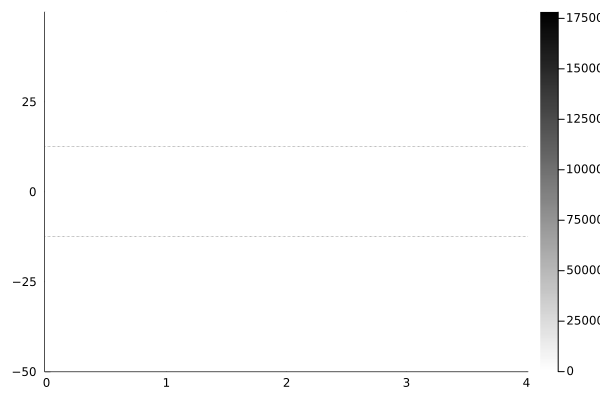

In [4]:
using Plots
using FFTW
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

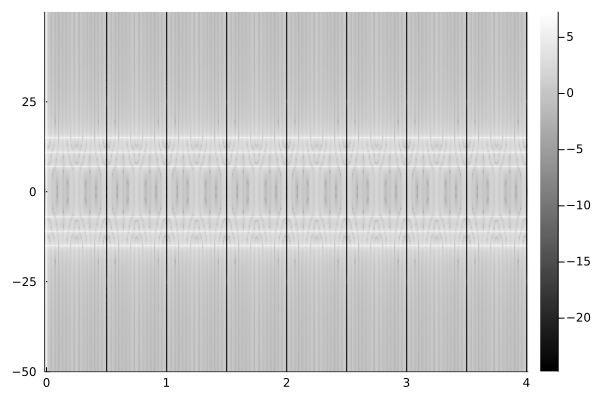

In [18]:
L = 4 #length
T = 20 #Total
delta_t = .01 #Timestep
c = 1 #Wavespeed
delta_r = .01 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+3, 1)
x[1]= -1*delta_r
for i = 1:Int(nrsteps)+2
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#Initial Conditions
for i=1:Int(nrsteps)+3
    u[i,1:2].=4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])
end
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

    end

end
#FFT Code starts here
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(freqs,1)),Int(size(u,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[j,i]=log10(abs(F[j]))
    end
end
#Plotting FFT code starts here
heatmap(x[:],(freqs),B,c=cgrad([:black,:white]))
#parameters: L=4, T=20, delta_t=0.01,delta_r=0.01,c=1
#Initial Data: 4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])

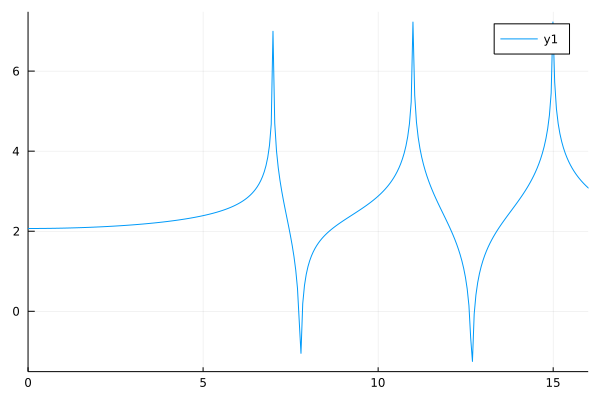

In [20]:
plot(freqs,B[:,300], xlims=(0,16))
#Initial Data: 4*sin(15*2pi*x[i])+4*sin(7*2pi*x[i])+4*sin(11*2pi*x[i])
#Expected Frequencies at 7, 11, and 15. 
# ~Works~

Below this may be outdated code that I just have down here to mess with
______________________________________________________________________

In [ ]:
L = 1 #length
T = 10 #Total Time
delta_t = .01 #Timestep
c = 1.5 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
using Plots
using FFTW
u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+3, 1)
x[1]= -1*delta_r
for i = 1:Int(nrsteps)+2
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#Random Initial Conditions
for i=1:Int(nrsteps)+3
    u[i,1:2].=4*rand()
end
#Leapfrog Integration
for j=2:(Int(ntsteps))

    for i = 2:Int(nrsteps)+2
        u[1,j] = -u[3,j]
        u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

    end

end
#Initial Condition: 4*sin(25*pi*x[i])
using Plots
using FFTW
using DSP
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

In [ ]:
using Random

In [ ]:
10*rand()

In [ ]:
#Initial Condition: 4*sin(25*pi*x[i])
using Plots
using FFTW
using DSP
freqs=fftfreq(size(u,2),1.0/delta_t) |> fftshift
B = zeros(Int(size(u,1)),Int(size(freqs,1)))
for i = 1:Int(size(u,1))
    signal = u[i,:]
    F = fft(signal) |> fftshift
    F=abs2.(F)
    for j = 1:length(F)
        B[i,j]=F[j]
    end
end
heatmap(x[:],(freqs),transpose(B),c=cgrad([:white,:black]))

In [ ]:
size(u,2)

In [ ]:
L = 4 #length
T = 10 #Total Time
delta_t = .01 #Timestep
c = 2 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string

In [ ]:
function wave_equation(delta_r, delta_t)
    L = 4
    T = 10
    c= 1.5
    ntsteps = T/delta_t #number of time steps
    nrsteps = L/delta_r #number of segments of string
    u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
    x = zeros(Int(nrsteps)+3, 1)
    x[1]= -1*delta_r
    for i = 1:Int(nrsteps)+2
        x[i+1]=x[i]+delta_r
    end
    t=zeros(Int(ntsteps)+1,1)
    t[1]=0
    for i =1:Int(ntsteps)
        t[i+1]=t[i]+delta_t
    end
    #Initial Conditions
    for i=1:Int(nrsteps)+3
        u[i,1:2].=4*sin(.5*pi*x[i])
    end
    #Leapfrog Integration
    for j=2:(Int(ntsteps))
        for i = 2:Int(nrsteps)+2
            u[1,j] = -u[3,j]
            u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
            u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])
        end
    u[1,:] = -u[3,:]
    u[Int(nrsteps+3),:] = -u[Int(nrsteps+1),:]
    end
    error_list = []
    error_max = 0
    for i =1:Int(nrsteps)+3
        error_list = vcat(error_list,abs(u[i,Int((8/delta_t)+1)]-4*sin(.5*pi*x[i])))
    end
    error_max = maximum(error_list)
    return error_max,delta_r
end
y = []
for i = 0.02:0.01:20
    if isinteger(L/i) && isinteger(T/(.5*i))
        y = vcat(y,wave_equation(i,.5*i))
    end
end
z = []
w = []
#Log the error and delta_r
for i = 1:size(y,1)-2
    a = log10(y[i,1][1])
    z = vcat(z,a)
end
for i = 1:size(y,1)-2
    a = log10(y[i,1][2])
    w = vcat(w,a)
end
plot(w,z)

In [ ]:
d =[]
for i = 1:size(w,1)-1
    d=vcat(d,(z[i+1]-z[i])/(w[i+1]-w[i]))
end

In [ ]:
d

In [ ]:
    L = 4
    T = 10
    c= 1
    ntsteps = T/delta_t #number of time steps
    nrsteps = L/delta_r #number of segments of string
    u = zeros(Int(nrsteps)+3, Int(ntsteps)+1)
    x = zeros(Int(nrsteps)+3, 1)
    x[1]= -1*delta_r
    for i = 1:Int(nrsteps)+2
        x[i+1]=x[i]+delta_r
    end
    t=zeros(Int(ntsteps)+1,1)
    t[1]=0
    for i =1:Int(ntsteps)
        t[i+1]=t[i]+delta_t
    end
    #Initial Conditions
    for i=1:Int(nrsteps)+3
        u[i,1:2].=4*sin(.5*pi*x[i])
    end
    #Leapfrog Integration
    for j=2:(Int(ntsteps))

        for i = 2:Int(nrsteps)+2
            u[1,j] = -u[3,j]
            u[Int(nrsteps+3),j] = -u[Int(nrsteps+1),j]
            u[2,j]=0
            u[Int(nrsteps+2),j]=0
            u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])

        end
    end
    anim = @animate for i ∈ 1:Int(ntsteps)+1
        plot(x[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-4,4))
    end
    gif(anim, "sine_wave_good.gif",fps=15)

In [ ]:
y = []
for i = 0.02:0.02:10
    if isinteger(L/i) && isinteger(T/(.5*i))
        y = vcat(y,wave_equation(i,.5*i))
    end
end

In [ ]:
z = []
w = []
for i = 1:size(y,1)
    a = log10(y[i,1][1])
    z = vcat(z,a)
end
for i = 1:size(y,1)
    a = log10(y[i,1][2])
    w = vcat(w,a)
end


In [ ]:
plot(w,z)

In [ ]:
anim = @animate for i ∈ 1:Int(ntsteps)+1
    plot(x[2:Int(nrsteps+2)],u[2:Int(nrsteps+2),i], xlims =(0,4),ylims=(-4,4))
end
gif(anim, "sine_wave_good.gif",fps=15)

In [ ]:
#Same as above but trying a dirac function in the middle
L = 4 #length
T = 4 #Total Time
delta_t = .01 #Timestep
c = 2 #Wavespeed
delta_r = .02 #Spatial step
ntsteps = T/delta_t #number of time steps
nrsteps = L/delta_r #number of segments of string
using Plots
u = zeros(Int(nrsteps)+2, Int(ntsteps)+1)
x = zeros(Int(nrsteps)+2, 1)
x[1]= -0.5*delta_r
for i = 1:Int(nrsteps)+1
    x[i+1]=x[i]+delta_r
end
t=zeros(Int(ntsteps)+1,1)
t[1]=0
for i =1:Int(ntsteps)
    t[i+1]=t[i]+delta_t
end
#=Initial Conditions
for i=1:Int(nrsteps)+2
    u[i,1:2].=4*sin(.5*pi*x[i])
end
=#
#Alternate Initial Conditions
for i=50:Int(nrsteps)-50
    u[i,1]=2
    u[i,2]=2
end


#Leapfrog Integration
for j=2:(Int(ntsteps))
    for i = 2:Int(nrsteps)+1
        u[i,j+1] = 2*u[i,j]-u[i,j-1]+((c*delta_t/delta_r)^(2))*(u[i-1,j]-2*u[i,j]+u[i+1,j])        
    end
end
#B.C
u[1,:] = -u[2,:]
u[Int(nrsteps+2),:]=-u[Int(nrsteps+1),:]
anim = @animate for i ∈ 1:Int(ntsteps)+1
    plot(x,u[:,i], xlims =(0,4),ylims=(-4,4))
end
gif(anim, "dirac_function.gif",fps=15)